# Load and preprocess data 

In [1]:
# import essentiell modules
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df01=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-01.csv', header=0)
df02=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-02.csv', header=0)
df03=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-03.csv', header=0)
df04=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-04.csv', header=0)
df05=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-05.csv', header=0)
df06=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-06.csv', header=0)
df07=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-07.csv', header=0)
df08=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-08.csv', header=0)
df09=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-09.csv', header=0)
df10=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-10.csv', header=0)
df11=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-11.csv', header=0)
df12=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-12.csv', header=0)
df13=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-13.csv', header=0)
df14=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-14.csv', header=0)
df15=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-15.csv', header=0)
df16=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-16.csv', header=0)
df17=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-17.csv', header=0)
df18=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/physio_sub-18.csv', header=0)

In [3]:
# concatenate all puls data from all subjects into one df
df = pd.concat([df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18])
print(df)

     Time Subject  heartrate Bedingung
0       1  Sub-01   54.87507     music
1       2  Sub-01   54.56021     music
2       3  Sub-01   54.34915     music
3       4  Sub-01   54.08023     music
4       5  Sub-01   53.80635     music
..    ...     ...        ...       ...
507   508  Sub-18   62.90909     water
508   509  Sub-18   63.19826     water
509   510  Sub-18   63.69337     water
510   511  Sub-18   64.85535     water
511   512  Sub-18   65.46280     water

[9216 rows x 4 columns]


## Analysis of heartrate data

## Test for normal distribution

https://statistikguru.de/spss/mixed-anova/normalverteilung-ueberpruefen-4.html

The independent variable should be normally distributed in each group. If this is the case, results can be interpreted quite easily. If not, there are several studies that verify the conduction of ANOVA even though normally distribution is not met(Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

In our study, heartrate data seperated into two groups showed no normal distribution even not after beeing logharithmically transformed (p< 0,05).
While analysing each group seperatly for each timepoint showed a normal distribution (p>0,05).


Die unabhängige Variable sollte bei einer mixed ANOVA für jede Gruppe und für jede Stufe des Faktors etwa normalverteilt sein. Ist dies der Fall, so lassen sich die Ergebnisse am fehlerfreisten interpretieren. Allerdings gibt es auch genügend Belege aus aktuellen Studien, dass die ANOVA robust gegenüber einer Verletzung der Normalverteilung ist (Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

Puls-Werte waren für alle Gruppen nicht normalverteilt (p < .05). In der Analyse der einzelnen Gruppen zu jedem Zeitpunkt zeigte sich allerdings jeweils eine Normalverteilung.

In [14]:
# check for a normally distributed sample (normality)
import pingouin as pg
pg.normality(df, group='Bedingung', dv='heartrate')

/home/rebekka/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
music,0.94483,4.197505e-40,False
water,0.95545,1.185301e-33,False


In [32]:
# check for normal distribution in the group listening to water
df_norm_w=df.loc[(df['Bedingung'] == ('water'))]
pg.normality(df_norm_w, group='Time', dv='heartrate')

,W,pval,normal
1,0.879920,0.187999,True
2,0.937964,0.591163,True
3,0.962403,0.832660,True
4,0.930024,0.516293,True
5,0.895688,0.264073,True
...,...,...,...
508,0.868111,0.144443,True
509,0.846696,0.088186,True
510,0.834467,0.066052,True
511,0.841785,0.078567,True


In [33]:
#check for normal distribution in the group listening to music
df_norm_m=df.loc[(df['Bedingung'] == ('music'))]
pg.normality(df_norm_m, group='Time', dv='heartrate')

,W,pval,normal
1,0.916818,0.331181,True
2,0.934826,0.496997,True
3,0.925744,0.407361,True
4,0.918443,0.344155,True
5,0.907265,0.262730,True
...,...,...,...
508,0.928635,0.434599,True
509,0.929815,0.446071,True
510,0.928145,0.429895,True
511,0.919753,0.354904,True


## Test for homoscedasticity

There was homogeneity of the error variances, as assessed by Levene’s test (p > .05).

Homogenität des Varianzen ist gegeben

Homogenität der Fehlervarianzen zwischen den Gruppen war gemäß dem Levene-Test für alle Variablen erfüllt (p > .05).

In [34]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df, group='Time', dv='heartrate')

,W,pval,equal_var
levene,0.281,1.0,True


## Test for sphericity

Sphericity was met (p>0,05)

Für die Pulsdaten liegt Sphärizität vor (Mauchly Test: p>0,05)


Sphärizität ist eine der wichtigsten Voraussetzungen der mixed ANOVA. Sphärizität ist eine Annahme, die bei allen Verfahren mit Messwiederholung gemacht wird, die mehr als zwei Stufen haben. Bei vorliegender Sphärizität sind die Differenzen aller Stufen der unabhängigen Variablen gleich. Man sagt auch, das Homoskedastizität zwischen den Stufen vorliegt.

In [15]:
pg.sphericity(df, subject='Subject', dv='heartrate', within='Time')

/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/distribution.py:955: RuntimeWarning: overflow encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d
/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/distribution.py:956: RuntimeWarning: divide by zero encountered in log
  logW = np.log(W)


(True, 0.0, -inf, 130815, 1.0)

## Descriptive statistics

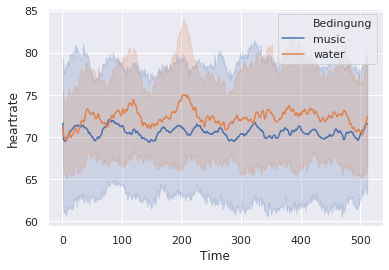

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")
sns.lineplot(x="Time", y="heartrate", hue="Bedingung", data=df)

In [37]:
df.groupby(['Time', 'Bedingung'])['heartrate'].agg(['mean', 'std']).round(2)

mean    std
Time Bedingung              
1    music      71.66  14.11
     water      71.32   6.03
2    music      69.71  13.88
     water      70.37   6.63
3    music      69.62  14.09
...               ...    ...
510  water      71.70  10.26
511  music      71.62  13.85
     water      72.20  10.18
512  music      71.51  13.87
     water      72.46  10.10

[1024 rows x 2 columns]

# Conduct a mixed (split-plot) ANOVA
There was no statistically significant interaction between time and group, punc = 1.

no significant Interaction detected (p>0,05)--> no post-hoc tests
Es gab keine statistisch signifikante Interaktion zwischen der Zeit und den Untersuchungsgruppen (F=0,59, p=1, np2=0,036)

In [38]:
import pingouin as pg
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='heartrate', within='Time', between='Bedingung', subject='Subject', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)

/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/distribution.py:955: RuntimeWarning: overflow encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d
/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/distribution.py:956: RuntimeWarning: divide by zero encountered in log
  logW = np.log(W)



ANOVA SUMMARY

Source             SS    DF1    DF2        MS      F    p-unc    np2  eps
-----------  --------  -----  -----  --------  -----  -------  -----  -----
Bedingung    6946.952      1     16  6946.952  0.098    0.758  0.006  -
Time         3167.641    511   8176     6.199  0.776    1.000  0.046  0.013
Interaction  2439.365    511   8176     4.774  0.598    1.000  0.036  -

